### Import the library that we need to complete the function. Import the pandas library using the common nickname 'pd'.

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd


### Step1. Document Dr. X's get_sequences_from_file() functions with comments and with markdown text

**Below is a function that will take a fasta file as input or arguments and will return a dictionay type object that contain pair of keys and values. In this case, for each pair, the key is the species name and value is the cytochrome-b sequence of that species**

In [2]:
def get_sequences_from_file(fasta_fn):                       ##define the name of a function
    sequence_data_dict = {}                                  ##declare a dictionary type variable which will be the return object
    for record in SeqIO.parse(fasta_fn, "fasta"):            ##a for loop for each record in the fasta file, do several things:
        description = record.description.split()             ##split the description for each record by space and put it to a list named as "description
        species_name = description[1] + " " + description[2] ##define a species name is the second and third element in description list with a space in between
        sequence_data_dict[species_name] = record.seq        ##assign the sequence of a record to be the value of a species name in dictionary object
    return(sequence_data_dict)                               ##return the dicionary object

### Task2. Write the string-translate function

**Below is a function that will take a string that contain a DNA sequence, and return a string that contains the corresponding translated amino acid sequence**

In [3]:
def translate_function(string_nucleotides):                                     ##define the name of the string translate function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] ##Indicate that what type of translation table to use, here we use the translation table for Vertebrate Mitochondrial DNA 
    aa_seq_string = ""                                                          ##declare a string variable named aa_seq_string which will be used to hold the translated amino acid sequence 
    for n in range(0, len(string_nucleotides), 3):                              ##for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
      codon = string_nucleotides[n:n+3]                                         ##subset the string to each three base pair and put it to a variable named codon
      if codon in mito_table.stop_codons:                                       ##if statement is used to check if the codon is a stop codon, I should leave it off and skip from the for loop
         break
      aa = mito_table.forward_table[codon]                                      ##translate the codon using ranslation table for Vertebrate Mitochondrial DNA
      aa_seq_string += aa                                                       ##add the translated amino acid to aa_seq_string
    return (aa_seq_string)                                                      ##after done with the for loop, return the string of amino acid sequence

### Task3. Write my alternative string-translate function

In [4]:
##Befor start this alternative string-translate function, I need to import some library from Biopython that I need 

In [5]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

**Below is a alternative string-translate function that will take a string that contain a DNA sequence, and return a string that contains the corresponding translated amino acid sequence. This function will translate the stop codon to be a \*. I learned to do this part from http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc26**

In [6]:
def alt_translate_function(string_nucleotides):                          ##define the name of the string translate function to be alt_translate_function
    coding_dna = Seq(string_nucleotides, IUPAC.unambiguous_dna)          ##adding a string of nucleotide sequence to an unambiguous IUPAC DNA sequence, resulting in an ambiguous nucleotide sequence
    aa_sequence = coding_dna.translate(table="Vertebrate Mitochondrial") ##using the translation table for Vertebrate Mitochondrial DNA
    aa_seq_string = str(aa_sequence)                                     ##turn the seq objects to string
    return (aa_seq_string)                                               ##return the string of amino acid sequence

### Task4. Write a function that calculates the proportion of each of 3 amino acid categories in a sequence

**Below is a function that will take a string that contain an amino-acid sequence and compute the porportion of the 3 different categories of amino acid**

In [7]:
def get_proportion_aa_type_function(aa_seq):                        ##define the name of the function to be get_proportion_aa_type_function
    charged = ['R','K','D','E']                                     ##declare the lists of three category of amino acid
    polar = ['Q','N','H','S','T','Y','C','M','W']
    hydrophobic = ['A','I','L','F','V','P','G']
    total_count = 0                                                 ##declare the total count and count for each category of amino acid and assign i
    charged_count = 0                                               ##to 0
    polar_count = 0
    hydrophobic_count = 0
    for aa in aa_seq:                                               ##using a for loop to loop through each character in the amino acid sequence
        if aa in charged:                                           ##count the number of amino acid when it appears in list of charged amino acid
          charged_count += 1                                        ##and assign it to charged_count
        if aa in polar:                                             ##do the same thing for polar and hydrophobic
           polar_count += 1
        if aa in hydrophobic:
           hydrophobic_count += 1
    total_count = charged_count + polar_count + hydrophobic_count   ##sum the counts from each of the category to get total count
    proportion_charged = charged_count / total_count                ##calculate the proportion for each category
    proportion_polar = polar_count / total_count
    proportion_hydro = hydrophobic_count / total_count
    return proportion_charged, proportion_polar, proportion_hydro   ##return the proportions for each of the category

### Task5. Complete the empty columns in the dataframe by calling functions from 1, 3 and 4

In [8]:
##loading the data into a dataframe using panda's read_csv()
bear_df = pd.read_csv("bears_data.csv")                  
species_list = list(bear_df.species)
##call the function get_sequences_from_file() from task 1 to get a dictionionay that contains the species name
##and the DNA sequence for each corresponding species
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
##use a for loop to translate each sequence and also gets the proportion
for key, value in cytb_seqs.items():
    dna_seq = str(value)                                                  ##turn the value from the dictionary to a string which will 
    aa_seq = alt_translate_function(dna_seq)                              ##the input for alt_translate_function()
    aa_proportions = get_proportion_aa_type_function(aa_seq)              ##get proportion for each of the three aa categroy
    bear_df.loc[bear_df.species==key, 'charged'] = aa_proportions[0]      ##set the value for each proportion in the dataframe
    bear_df.loc[bear_df.species==key, 'polar'] = aa_proportions[1]
    bear_df.loc[bear_df.species==key, 'hydrophobic'] = aa_proportions[2]

In [9]:
##visualize the bear_df after the calculateion
bear_df 

,species,mass,charged,polar,hydrophobic
0,Ursus spelaeus,550.800,0.092348,0.329815,0.577836
1,Ursus arctos,203.500,0.092348,0.324538,0.583113
2,Ursus thibetanus,99.714,0.092348,0.327177,0.580475
3,Melursus ursinus,100.030,0.089710,0.340369,0.569921
4,Ursus americanus,110.560,0.089710,0.337731,0.572559
5,Helarctos malayanus,47.020,0.092348,0.340369,0.567282
6,Ailuropoda melanoleuca,118.200,0.089710,0.343008,0.567282
7,Tremarctos ornatus,140.700,0.089710,0.335092,0.575198
8,Ursus maritimus,425.100,0.092348,0.327177,0.580475


### Task6. Plot a bar-chart of adult mass per species

In [10]:
%matplotlib inline

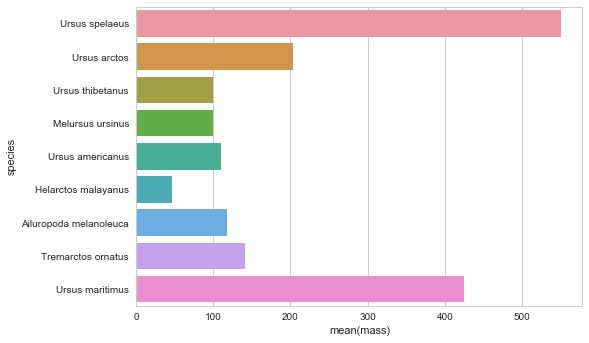

In [11]:
##using the seaborn to plot bar-chart of adult mass per species
##load the seaborn package
##This part was learned from website(https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.barplot(x="mass", y="species", data=bear_df)

**We can see from the above bar-chart that the largest bear species is Ursus spelaeus. And some other intersting aspect of this specis is that this species has extincted about 24,000 years ago during the Last Glacial Maximum. This bear also named cave bear as fossils of this species mostly found in caves.(Information get from:https://en.wikipedia.org/wiki/Cave_bear)**

### Task7. Plot a visualization of the proportions for amino-acid type for the bear species

**Before do the plot, I melted the dataframe first to make it from short format to the long format using the pd.melt()**

In [12]:
bear_melted_df = pd.melt(bear_df, id_vars= ['species', 'mass'], value_vars = [ 'charged', 'polar', 'hydrophobic'])

In [13]:
##visualize the new dataframe bear_melted_df
bear_melted_df

,species,mass,variable,value
0,Ursus spelaeus,550.800,charged,0.092348
1,Ursus arctos,203.500,charged,0.092348
2,Ursus thibetanus,99.714,charged,0.092348
3,Melursus ursinus,100.030,charged,0.089710
4,Ursus americanus,110.560,charged,0.089710
5,Helarctos malayanus,47.020,charged,0.092348
6,Ailuropoda melanoleuca,118.200,charged,0.089710
7,Tremarctos ornatus,140.700,charged,0.089710
8,Ursus maritimus,425.100,charged,0.092348
9,Ursus spelaeus,550.800,polar,0.329815


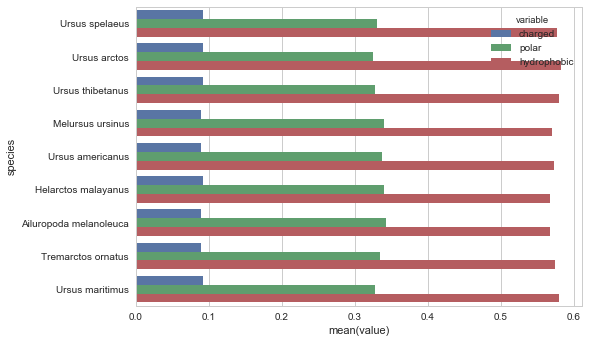

In [14]:
##plot the thee amino acid proportions for each bear species using seaborn
ax = sns.barplot(x="value", y="species", hue="variable",   data=bear_melted_df)

**We can see from the above bar-chart of the proportions of three categories of amino acid, that within each species, the charged amino acid is about 9%, the polar amino acid is about32%-34%, and the hydrophobic amino acid is about 58%. And this pattertn is very consistent across species.**

### Task8. Save the new dataframe to a file called "bears_mass_cytb.csv" 

In [15]:
##Using the following code to save the new dataframe to "bears_mass_cytb.csv"
bear_df.to_csv('bears_mass_cytb.csv', sep = ',')

### Task9. Bonus task- write a function that calculate the length of amino acid sequence for each species and then store it into the dataframe, plot it out and visualize the protein length differences between species

**Write the function to calculate the protein length, which is modified from previous function get_proportion_aa_type_function() **

In [16]:
def get_aa_length_function(aa_seq):                                 ##define the name of the function to be get_proportion_aa_type_function
    charged = ['R','K','D','E']                                     ##declare the lists of three category of amino acid
    polar = ['Q','N','H','S','T','Y','C','M','W']
    hydrophobic = ['A','I','L','F','V','P','G']
    total_count = 0                                                 ##declare the total count and count for each category of amino acid and assign i
    charged_count = 0                                               ##to 0
    polar_count = 0
    hydrophobic_count = 0
    for aa in aa_seq:                                               ##using a for loop to loop through each character in the amino acid sequence
        if aa in charged:                                           ##count the number of amino acid when it appears in list of charged amino acid
          charged_count += 1                                        ##and assign it to charged_count
        if aa in polar:                                             ##do the same thing for polar and hydrophobic
           polar_count += 1
        if aa in hydrophobic:
           hydrophobic_count += 1
    total_count = charged_count + polar_count + hydrophobic_count   ##sum the counts from each of the category to get total count
    return total_count                                              ##return the proportions for each of the category

**Using a for loop Calculate the amino acid length for each species by calling function alt_translate_function() from task 3 and the get_aa_length_function(), then store it into the dataframe bear_df**

In [17]:
##Before run the for loop, first add a new column named protein_length to the existing dataframe bear_df

bear_df['protein_length'] = ""
bear_df

,species,mass,charged,polar,hydrophobic,protein_length
0,Ursus spelaeus,550.800,0.092348,0.329815,0.577836,
1,Ursus arctos,203.500,0.092348,0.324538,0.583113,
2,Ursus thibetanus,99.714,0.092348,0.327177,0.580475,
3,Melursus ursinus,100.030,0.089710,0.340369,0.569921,
4,Ursus americanus,110.560,0.089710,0.337731,0.572559,
5,Helarctos malayanus,47.020,0.092348,0.340369,0.567282,
6,Ailuropoda melanoleuca,118.200,0.089710,0.343008,0.567282,
7,Tremarctos ornatus,140.700,0.089710,0.335092,0.575198,
8,Ursus maritimus,425.100,0.092348,0.327177,0.580475,


In [18]:

for key, value in cytb_seqs.items():
    dna_seq = str(value)                                                  ##turn the value from the dictionary to a string which will 
    aa_seq = alt_translate_function(dna_seq)                              ##the input for alt_translate_function()
    aa_length = get_aa_length_function(aa_seq)                            ##get the length of protein for each of species
    bear_df.loc[bear_df.species==key, 'protein_length'] = aa_length       ##set the value in the dataframe
 

In [19]:
##visualize the dataframe after the calculation 
bear_df

,species,mass,charged,polar,hydrophobic,protein_length
0,Ursus spelaeus,550.800,0.092348,0.329815,0.577836,379
1,Ursus arctos,203.500,0.092348,0.324538,0.583113,379
2,Ursus thibetanus,99.714,0.092348,0.327177,0.580475,379
3,Melursus ursinus,100.030,0.089710,0.340369,0.569921,379
4,Ursus americanus,110.560,0.089710,0.337731,0.572559,379
5,Helarctos malayanus,47.020,0.092348,0.340369,0.567282,379
6,Ailuropoda melanoleuca,118.200,0.089710,0.343008,0.567282,379
7,Tremarctos ornatus,140.700,0.089710,0.335092,0.575198,379
8,Ursus maritimus,425.100,0.092348,0.327177,0.580475,379


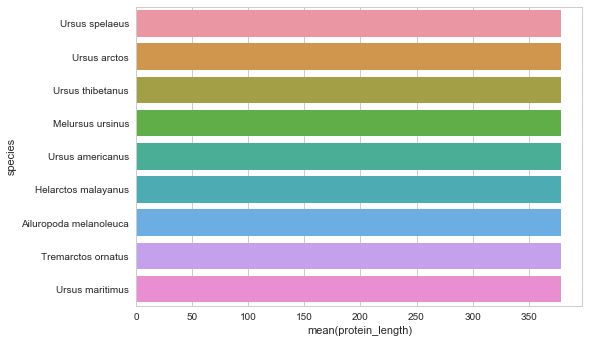

In [20]:
##Using seaborn plot it out to visualize the protein length for each species
ax = sns.barplot(x="protein_length", y="species",  data=bear_df)

**From the above bar-chart we could see that all of the species have the same cytochrome-b protein length. And together with the findings from task7, we can tell that the length of the cytochrome-b sequences are very conserved. However since the proportions of each three type of amino acid across species are still sligtly different from each other, there are still fair amount of polymorhisms exists for the cytochrome-b protein across bear species. And of course, further invesitgation such as calculate the polymorphisms at each of the corresponding nucleotid or amino acid position can be carried out to confirm this.**